## Penguin classification

### Life cycle of Machine learning project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1. Problem statement
- This project understands the the physical characteristics of a Penguins and classify them

#### 2. Data Collection
- Dataset source - https://allisonhorst.github.io/palmerpenguins/
    
- This data consists of 344 rows and 7 columns

#### 2.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/penguins.csv')

##### Show Top 5 Records

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


##### Shape of the dataset

In [5]:
df.shape

(344, 7)

#### 2.2 Dataset information
- species : variety of penguins -> (Adelie,Chinstrap,Gentoo)
- island : island of penguin -> (Torgersen,Biscoe,Dream)
- bill_length_mm : bill length of penguin -> Numerical
- bill_depth_mm : bill depth of penguin -> Numerical
- flipper_length_mm : flipper length of penguin -> Numerical
- body_mass_g : body weight of penguin -> Numerical
- sex : Gender of penguin -> (Male,Female)

#### 3.Data Checks to Perform
- check and Handle Missing values
- check Duplicates
- check data type
- check the number of unique values of each column
- check statistics of data set
- check various categories present in the different categorical column

#### 3.1 Check and Handle Missing values

In [6]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

 There are 2 Missing values in all Numerical and 11 Missing values in sex

In [7]:
df = df.dropna()

In [10]:
df.shape

(333, 7)

 Handled using droppping

#### 3.2 Check and Handle Duplicates

In [12]:
df.duplicated().sum()

np.int64(0)

There are no duplicates values in the dataset

#### 3.3 Check Data types

In [13]:
#check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


#### 3.4 Checking the number of unique values

In [14]:
df.nunique()

species                3
island                 3
bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
sex                    2
dtype: int64

#### 3.5 Check statistics of dataset

In [15]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


#### 3.6 Exploring Data

How many species are there?

In [16]:
df.species.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

How many islands are there?

In [17]:
df.island.value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

How many penguins are there in each gender?

In [18]:
df.sex.value_counts()

sex
Male      168
Female    165
Name: count, dtype: int64

#### 4. Exploring Data (Visualization)

##### Distribution of penguins according to gender

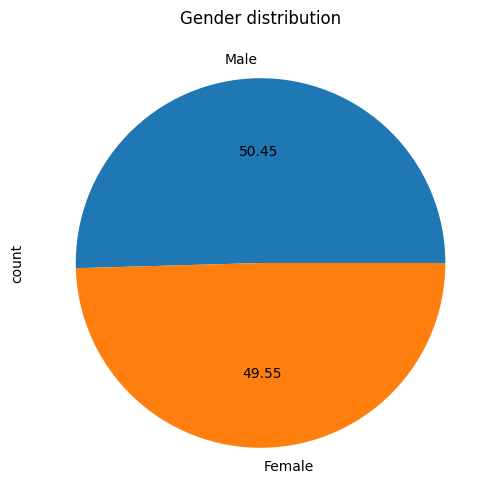

In [22]:
df.sex.value_counts().plot(kind="pie",figsize=(6,6), autopct='%.2f', title="Gender distribution")
plt.show()

##### Insights
- the data is equally distributed among genders

##### Distribution of penguins according to bill length

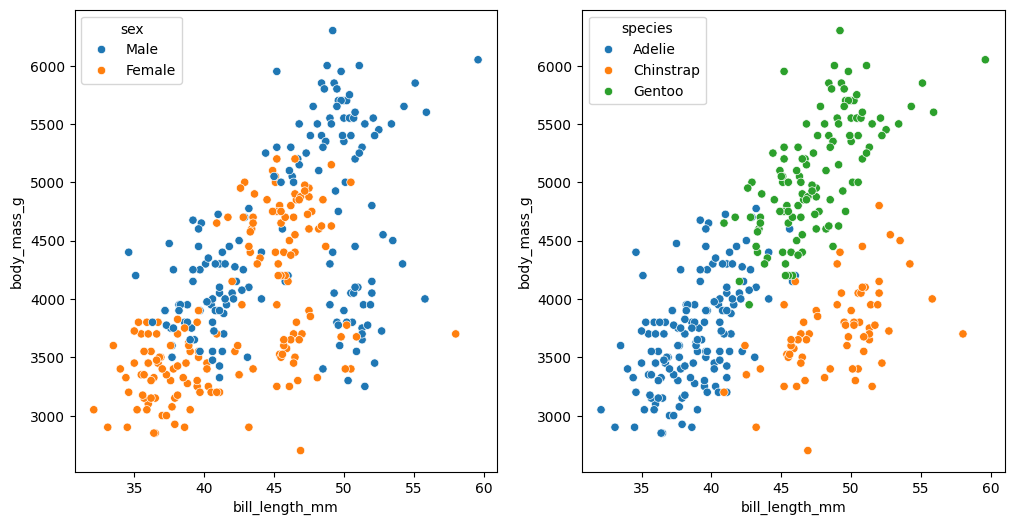

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=df, x='bill_length_mm',y='body_mass_g',hue='sex',ax=axes[0])
sns.scatterplot(data=df, x='bill_length_mm',y='body_mass_g',hue='species',ax=axes[1])
plt.show()

##### Insights
- it seems Gentoo having high bill length followed by chinstrap and then adelie
- Each species with less bill_length_mm is female

##### Distribution of Penguin according to bill_depth

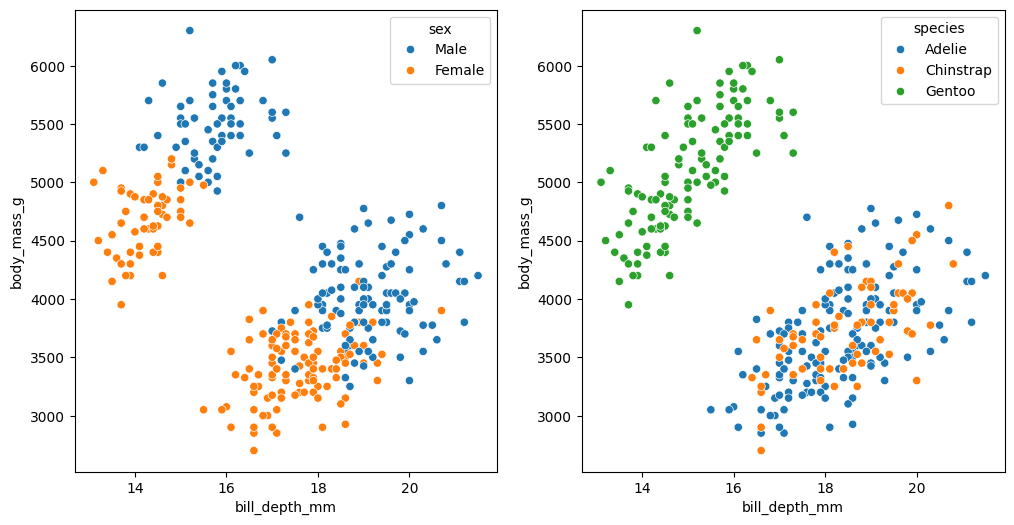

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=df, x='bill_depth_mm',y='body_mass_g',hue='sex',ax=axes[0])
sns.scatterplot(data=df, x='bill_depth_mm',y='body_mass_g',hue='species',ax=axes[1])
plt.show()

##### Insights
- Gentoo can be easily identifiable by bill depth

##### Distribution of Penguin according to flipper length

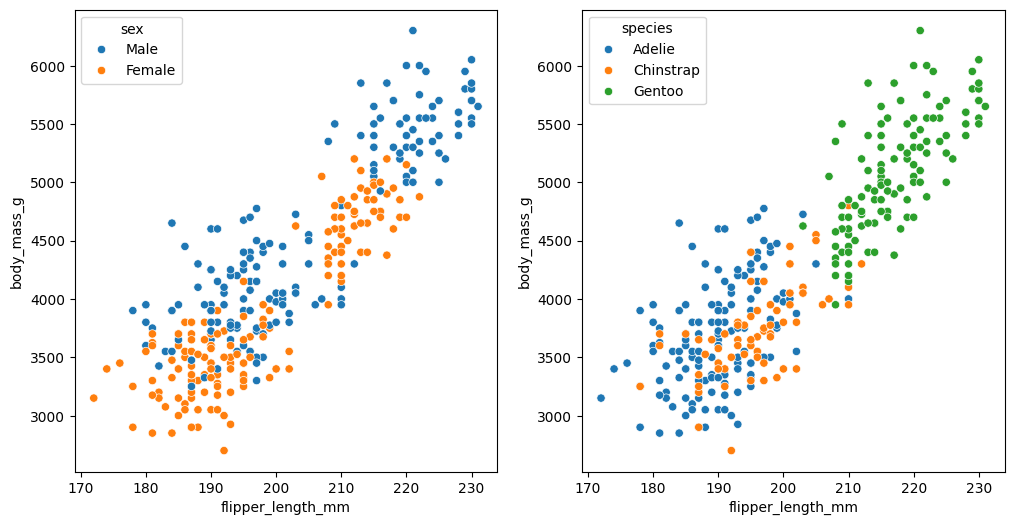

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=df, x='flipper_length_mm',y='body_mass_g',hue='sex',ax=axes[0])
sns.scatterplot(data=df, x='flipper_length_mm',y='body_mass_g',hue='species',ax=axes[1])
plt.show()

##### Insights
- it seems Gentoo having high flipper length and adelie, chistrap having similar flipperlength
- Each species with less flipper_length_mm is female

##### Diffrentiate between bill_length and bill_depth

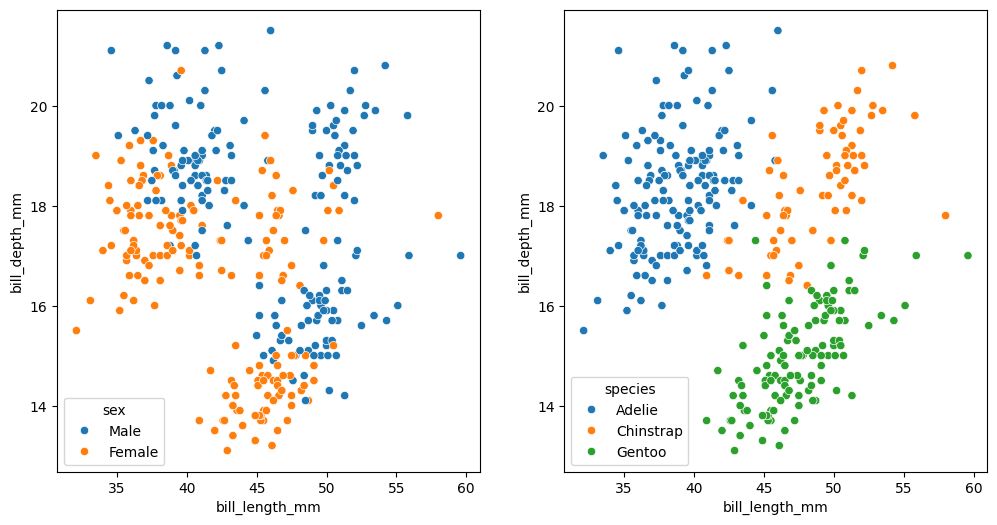

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=df, x='bill_length_mm',y='bill_depth_mm',hue='sex',ax=axes[0])
sns.scatterplot(data=df, x='bill_length_mm',y='bill_depth_mm',hue='species',ax=axes[1])
plt.show()

##### Insights
- can be easily diffrentiable by bill length and bill depth

##### Pairplot

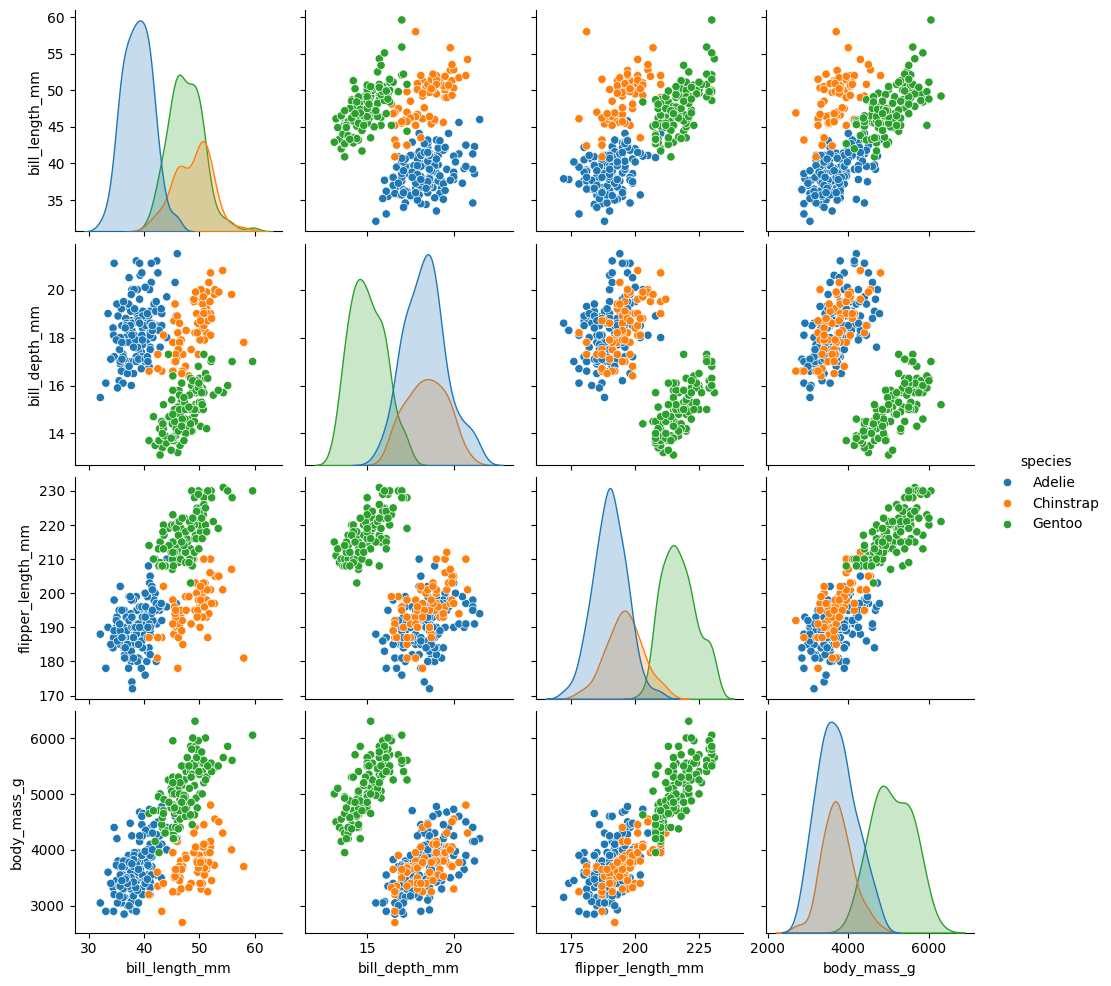

In [54]:
sns.pairplot(data=df, hue='species')

#### Conclusion

- Gentoo is having greatest of bill_length,bill_depth,flipper_length
- In Every classification male penguins are greater in size comparing female according to species